<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("sales_data_with_discounts.csv")

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Basic statistics
mean = df[numerical_cols].mean()
median = df[numerical_cols].median()
mode = df[numerical_cols].mode().iloc[0]
std_dev = df[numerical_cols].std()

# Display
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


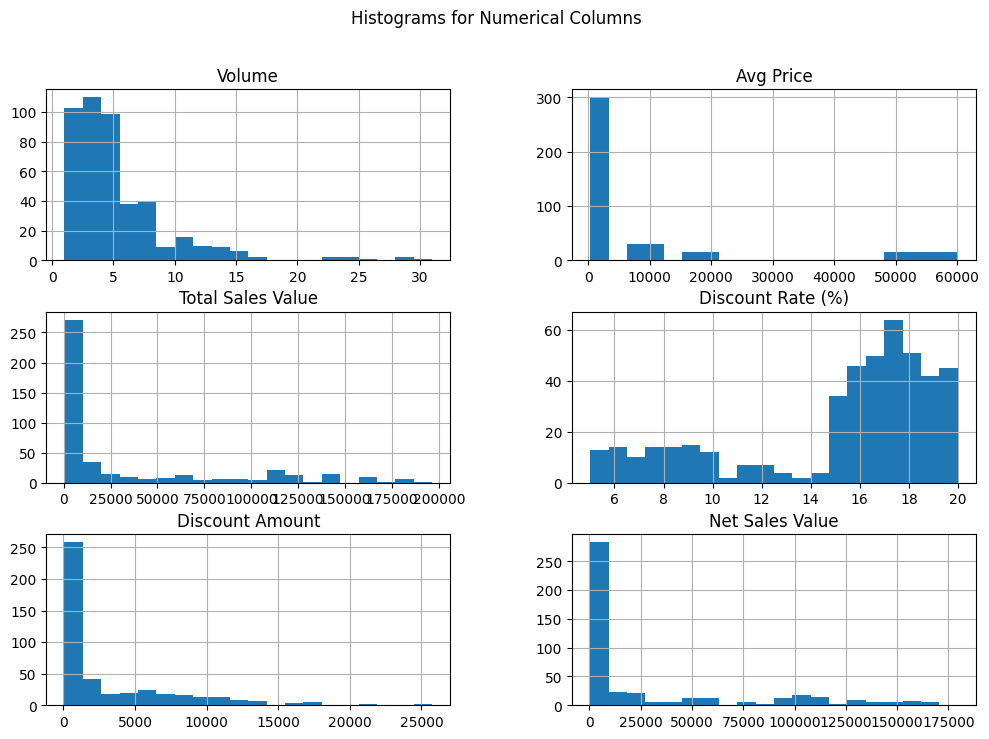

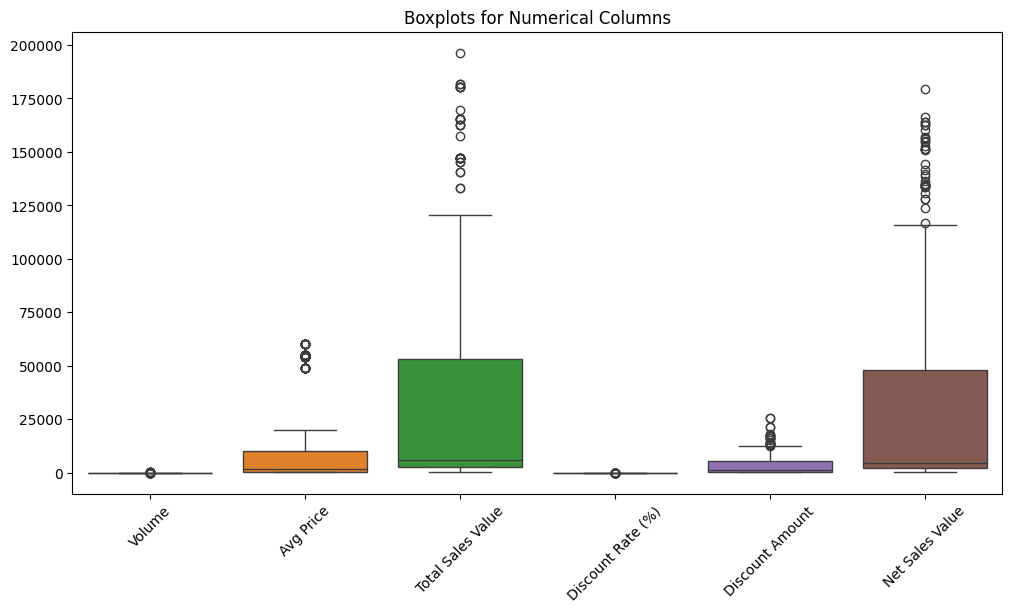

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms for Numerical Columns")
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots for Numerical Columns")
plt.xticks(rotation=45)
plt.show()

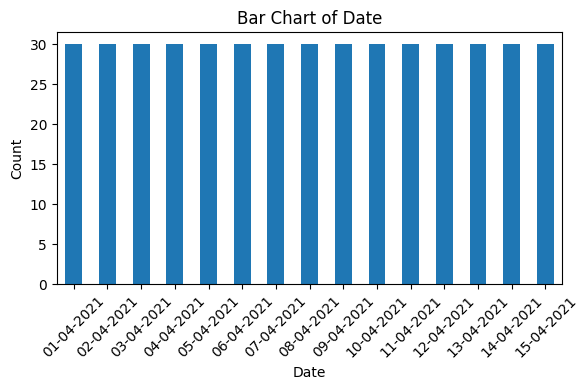

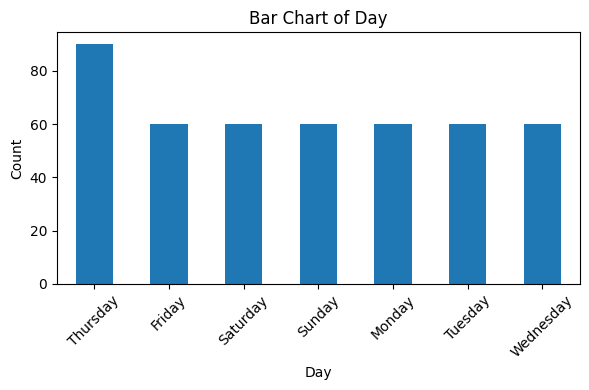

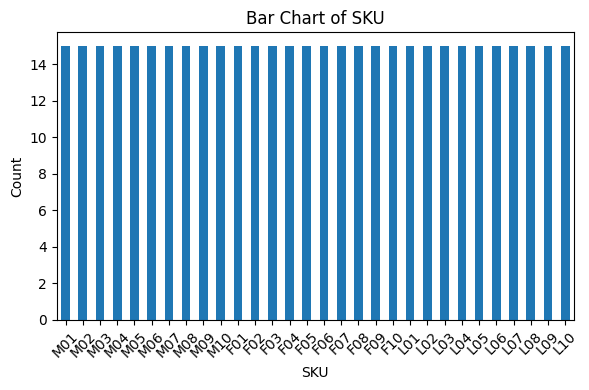

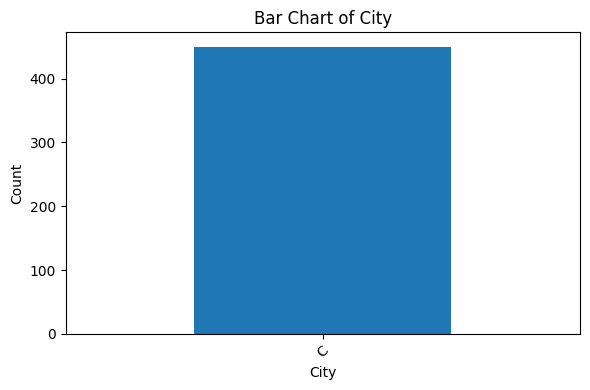

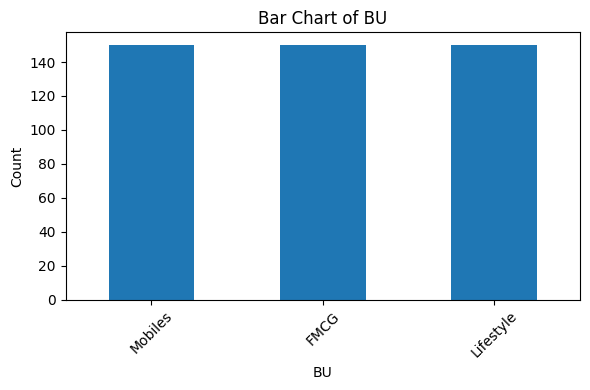

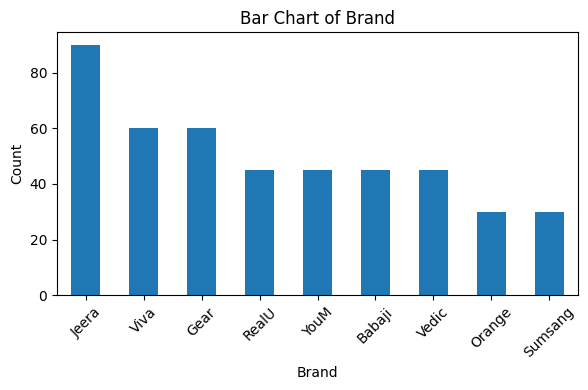

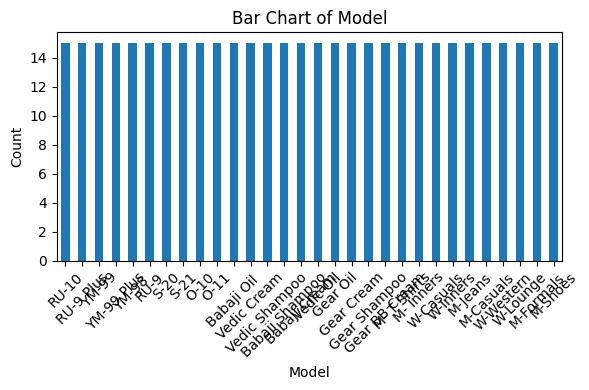

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
print("Original Data Sample:\n", df[numerical_cols].head())
print("\nStandardized Data Sample:\n", standardized_data.head())

Original Data Sample:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

Standardized Data Sample:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146  

In [ ]:

encoded_df = pd.get_dummies(df[categorical_cols])
print("Encoded Categorical Data:\n", encoded_df.head())

Encoded Categorical Data:
    Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0             True            False            False            False   
1             True            False            False            False   
2             True            False            False            False   
3             True            False            False            False   
4             True            False            False            False   

   Date_05-04-2021  Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_09-04-2021  Date_10-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            Fa

In [ ]:

final_df = pd.concat([standardized_data, encoded_df], axis=1)
print("Final Preprocessed Data Sample:\n", final_df.head())

Final Preprocessed Data Sample:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756             True            False            False   
1         1.271026             True            False            False   
2         1.545675             True            False            False   
3         1.765810             True            False            False   
4        -0.227595             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Crea